# 

# MNIST DATASET digit recognising using Tensorflow 2.0
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

# About data
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
df = train
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# plotting pixel as images

C:\Users\nilay khare\.conda\envs\tensorflow_python\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


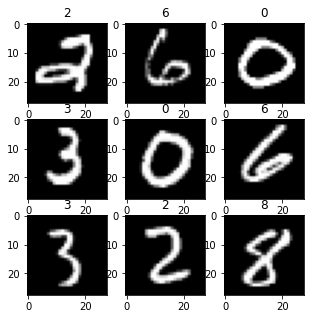

In [4]:
def show_image(pixel, label, index):
    image2d = pixel.values.reshape(28,28)
    plt.subplot('33%d' % (index))
    plt.imshow(image2d, cmap=plt.cm.gray)
    plt.title(label)

plt.figure(figsize=(5,5))
sample_image = train.sample(9).reset_index(drop=True)

for index, image in sample_image.iterrows():
    label = image['label']
    pixel = image.drop('label')
    show_image(pixel, label, index)

In [5]:
#checking for count of each label of train dataset
targets = df['label']
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
# number of labels
df['label'].value_counts().index


Int64Index([1, 7, 3, 9, 2, 6, 0, 4, 8, 5], dtype='int64')

In [7]:
labels = df['label'].unique()
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Making equal prior for each label so that it does not affect in training the model i.e.. for better training

In [8]:
minimum_prior_number = df['label'].value_counts().min()
train_prior = round(minimum_prior_number*0.9)
validate_prior = minimum_prior_number-train_prior
validate_prior

379

In [9]:
round(minimum_prior_number*0.1)

380

# creating training and validation dataset

In [10]:
train_equal_prior = train[train['label']==1][:train_prior]
train_equal_prior


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30706,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30707,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30736,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30749,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
validate_equal_prior = train[train['label']==1][-validate_prior:]
validate_equal_prior

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38519,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38542,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38543,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38544,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38547,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41952,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41954,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41960,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
for i in labels[1:]:
    train_equal_prior = pd.concat([train_equal_prior,train[train['label']==i][:train_prior]],axis=0)
    validate_equal_prior = pd.concat([validate_equal_prior,train[train['label']==i][-validate_prior:]],axis=0)
train_equal_prior

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34833,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34834,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34849,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34858,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
validate_equal_prior

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38519,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38542,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38543,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38544,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38547,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41921,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41927,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41967,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41993,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_equal_prior['label'].value_counts()

9    3416
8    3416
7    3416
6    3416
5    3416
4    3416
3    3416
2    3416
1    3416
0    3416
Name: label, dtype: int64

In [15]:
validate_equal_prior['label'].value_counts()

9    379
7    379
5    379
3    379
1    379
8    379
6    379
4    379
2    379
0    379
Name: label, dtype: int64

In [16]:
train_df = train_equal_prior.copy()
validate_df = validate_equal_prior.copy()

# shuffling both dataframes 

In [17]:
from sklearn.utils import shuffle
train_df = shuffle(train_df)
validate_df = shuffle(validate_df)
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29322,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25852,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19062,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
inputs = train_df.columns[1:]
inputs

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

# standardising the inputs in training and validation dataframe

In [19]:
X_train = train_df[inputs]/255.0
X_test = validate_df[inputs]/255.0
y_train = train_df['label']
y_test = validate_df['label']

# saving the data in form of tensors

In [20]:
np.savez('trainep',inputs =X_train , targets = y_train)

In [21]:
training_data = np.load('trainep.npz')
train_inputs = training_data['inputs'].astype(np.float)
train_targets = training_data['targets'].astype(np.float)

In [22]:
training_data['inputs']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
np.savez('valep',inputs = X_test , targets = y_test)

In [24]:
validation_data = np.load('valep.npz')
validation_inputs = validation_data['inputs'].astype(np.float)
validation_targets = validation_data['targets'].astype(np.float)

In [25]:
validation_data['inputs']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# training and fiting the model

In [47]:
input_size  = 784
output_size = 10
hidden_layer_size = 170

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(output_size, activation = 'softmax'),
])
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 500
max_epochs = 20
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 5)
model.fit(train_inputs,
         train_targets,
         batch_size = batch_size,
         epochs = max_epochs,
         callbacks = [early_stopping],
          validation_data = (validation_inputs,validation_targets),
          verbose = 2
         )

Train on 34160 samples, validate on 3790 samples
Epoch 1/20
34160/34160 - 3s - loss: 0.6385 - accuracy: 0.8246 - val_loss: 0.2693 - val_accuracy: 0.9208
Epoch 2/20
34160/34160 - 1s - loss: 0.2139 - accuracy: 0.9367 - val_loss: 0.1823 - val_accuracy: 0.9441
Epoch 3/20
34160/34160 - 1s - loss: 0.1513 - accuracy: 0.9559 - val_loss: 0.1553 - val_accuracy: 0.9536
Epoch 4/20
34160/34160 - 1s - loss: 0.1167 - accuracy: 0.9661 - val_loss: 0.1311 - val_accuracy: 0.9599
Epoch 5/20
34160/34160 - 1s - loss: 0.0924 - accuracy: 0.9730 - val_loss: 0.1073 - val_accuracy: 0.9660
Epoch 6/20
34160/34160 - 1s - loss: 0.0719 - accuracy: 0.9788 - val_loss: 0.1050 - val_accuracy: 0.9691
Epoch 7/20
34160/34160 - 1s - loss: 0.0573 - accuracy: 0.9830 - val_loss: 0.1049 - val_accuracy: 0.9673
Epoch 8/20
34160/34160 - 1s - loss: 0.0500 - accuracy: 0.9855 - val_loss: 0.0982 - val_accuracy: 0.9689
Epoch 9/20
34160/34160 - 1s - loss: 0.0359 - accuracy: 0.9903 - val_loss: 0.1019 - val_accuracy: 0.9710
Epoch 10/20
341

In [48]:
#evaluating model
model.evaluate(train_inputs, train_targets)

34160/34160 [==============================] - 3s 78us/sample - loss: 0.0124 - accuracy: 0.9970


[0.01239139305214197, 0.99701405]

In [28]:
test = pd.read_csv('test.csv')

standardizing the test data

In [29]:
test = test/255.0

In [30]:
np.savez('test',inputs =test)

In [31]:
test_data = np.load('test.npz')

In [32]:
test_inputs = test_data['inputs'].astype(np.float)

In [33]:
test_inputs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
predictions = model.predict(train_inputs,batch_size=1)

In [35]:
pred_values = tf.argmax(input=predictions, axis=1)
pred_values

<tf.Tensor: shape=(34160,), dtype=int64, numpy=array([9, 1, 7, ..., 0, 9, 9], dtype=int64)>

In [36]:
pred_values.numpy()

array([9, 1, 7, ..., 0, 9, 9], dtype=int64)

In [37]:
train_targets.round()

array([9., 1., 7., ..., 0., 9., 9.])

# prediction

In [38]:
test_predictions = model.predict(test_inputs,batch_size=1)

In [39]:
pred_values = tf.argmax(input=test_predictions, axis=1)
pred_values.numpy()
# extracting the predicted value

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [40]:
submission = pd.DataFrame({
    "ImageId": range(1,28001),
    "Label": pred_values
    })

In [41]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [42]:
submission.to_csv('submission.csv', index=False)